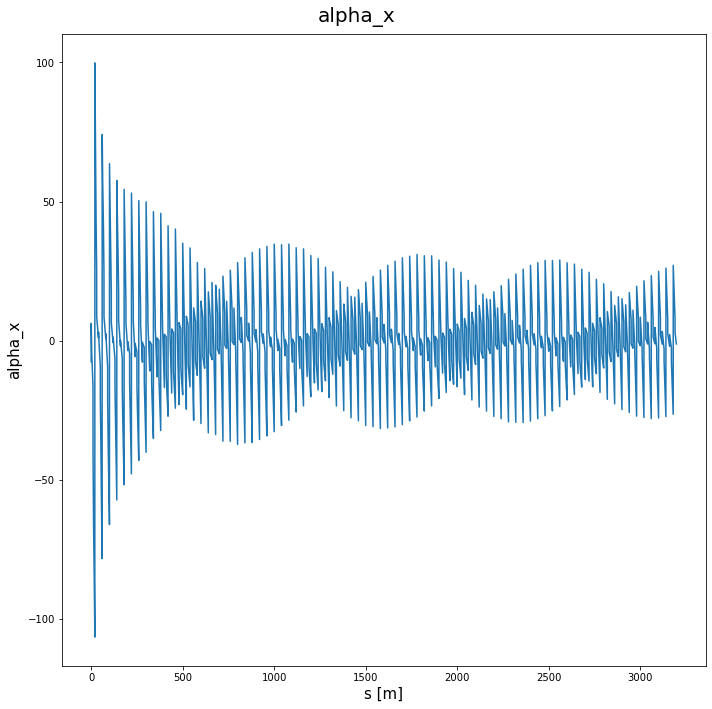

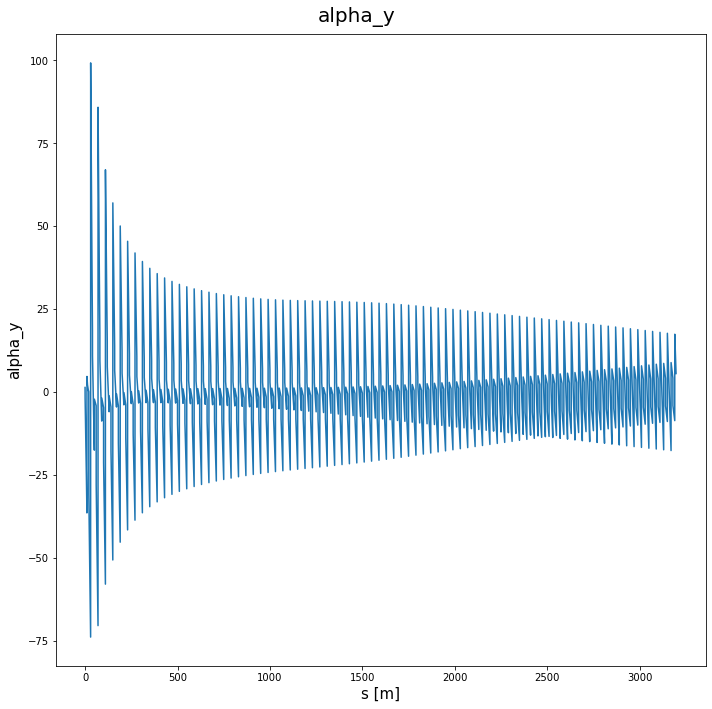

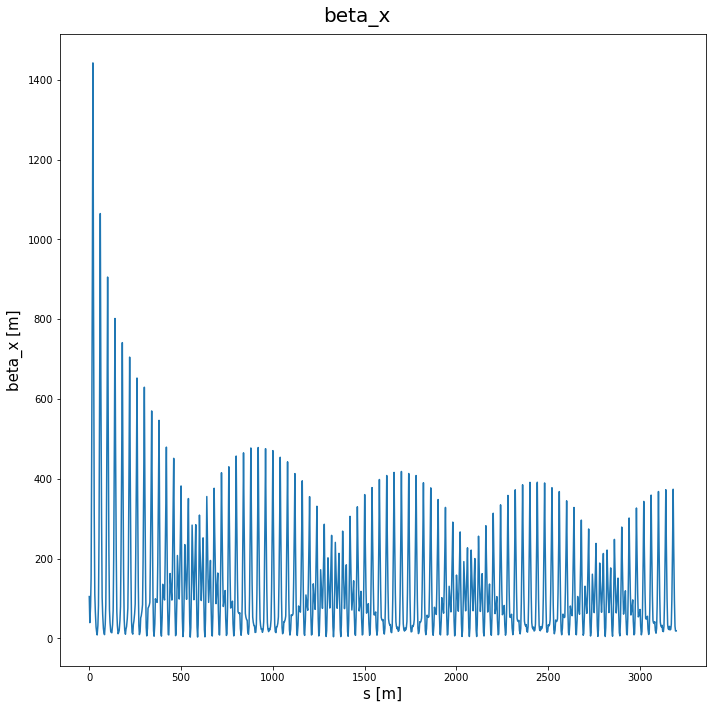

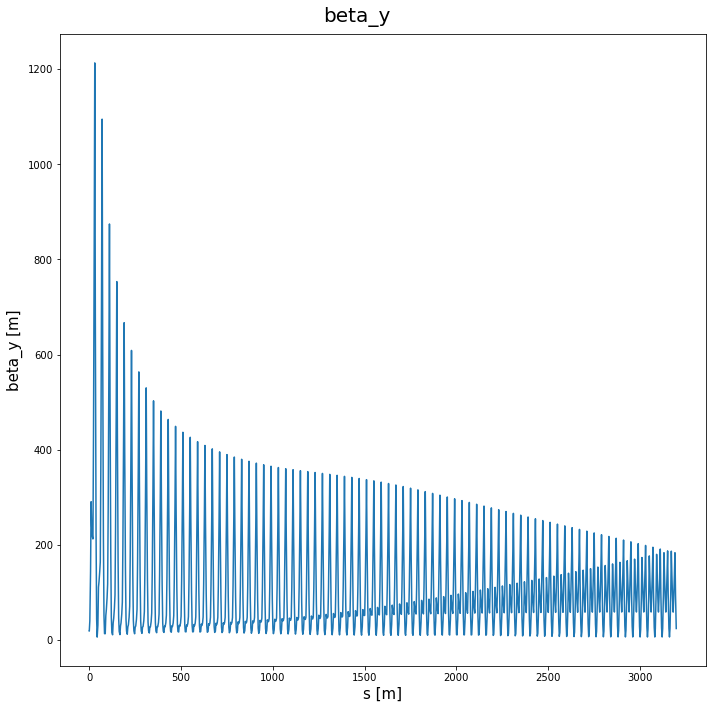

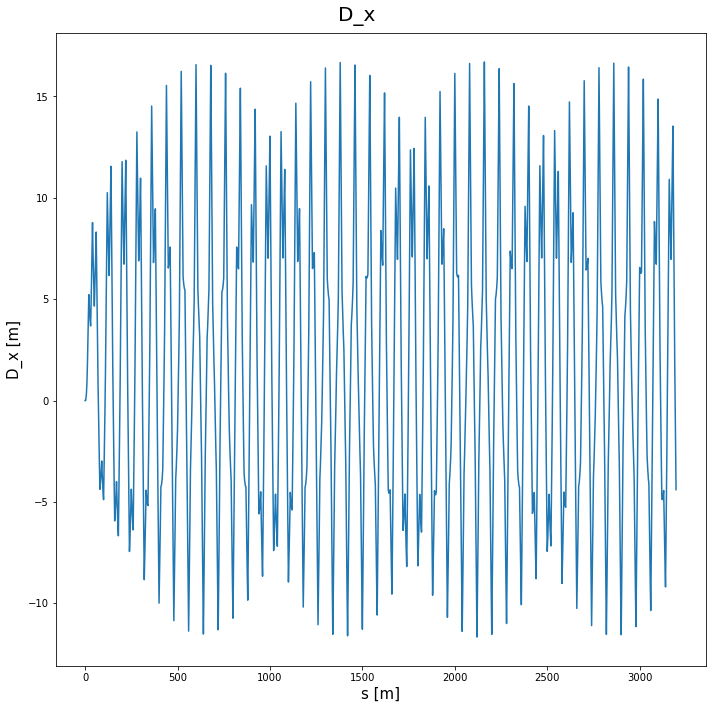

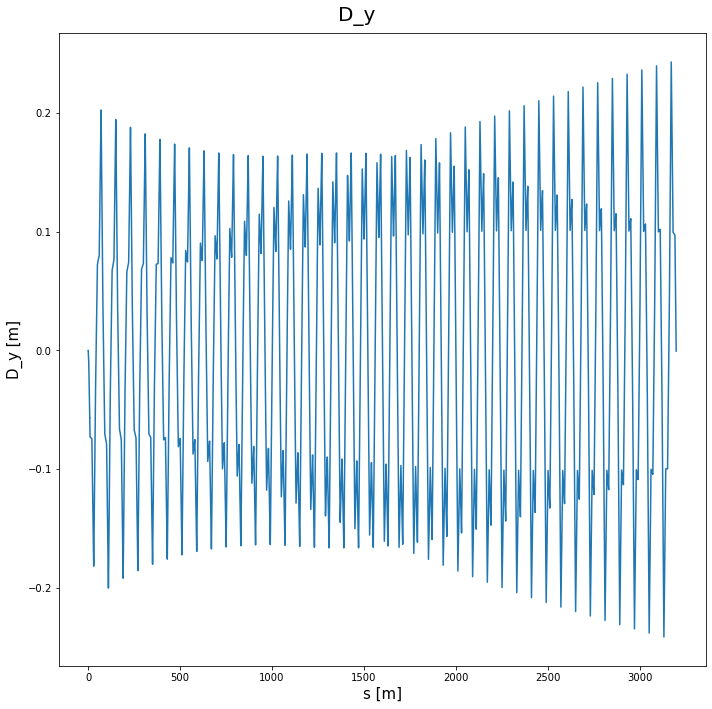

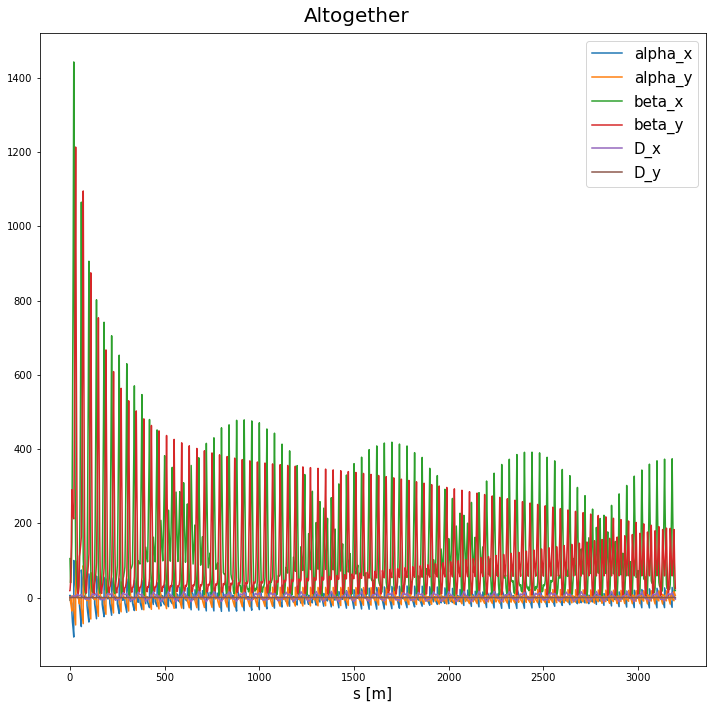

In [2]:
"""
#2
By Keon Hee Kim
"""

import math
import numpy as np
import tables as tb
import matplotlib.pyplot as plt

#Read the file
diagnostics = tb.open_file('diagnostics.h5', 'r')
s = diagnostics.root.s.read()
repetition = diagnostics.root.repetition.read()
corr = diagnostics.root.corr.read()
std =  diagnostics.root.std.read()
emitx = diagnostics.root.emitx.read()
emity = diagnostics.root.emity.read()
diagnostics.close()

#Data set
num_turns = 5
index = np.amax(np.where(repetition == num_turns - 1))
s_num_turns = s[0:index]
std_x = std[0,0:index]
std_xp = std[1,0:index]
std_y = std[2,0:index]
std_yp = std[3,0:index]
std_delta = std[5,0:index]
corr_x_xp = corr[0,1,0:index]
corr_y_yp = corr[2,3,0:index]
corr_x_delta = corr[0,5,0:index]
corr_y_delta = corr[2,5,0:index]
emit_x = emitx[0:index]
emit_y = emity[0:index]

#Calculate Twiss Parameters
alpha_x = [-math.pi * a * b * c / d for a, b, c, d in zip(corr_x_xp, std_x, std_xp, emit_x)]
alpha_y = [-math.pi * a * b * c / d for a, b, c, d in zip(corr_y_yp, std_y, std_yp, emit_y)]
beta_x = [math.pi * a**2 / b for a, b in zip(std_x, emit_x)]
beta_y = [math.pi * a**2 / b for a, b in zip(std_y, emit_y)]
D_x = [a * b * c / c**2 for a, b, c in zip(corr_x_delta, std_x, std_delta)]
D_y = [a * b * c / c**2 for a, b, c in zip(corr_y_delta, std_y, std_delta)]

#Plot alpha_x
plt.figure(figsize = (10,10))
plt.plot(s_num_turns, alpha_x)
plt.xlabel('s [m]', fontsize=15)
plt.ylabel('alpha_x', fontsize=15)
plt.suptitle('alpha_x', size=20)
plt.tight_layout()

#Plot alpha_y
plt.figure(figsize = (10,10))
plt.plot(s_num_turns, alpha_y)
plt.xlabel('s [m]', fontsize=15)
plt.ylabel('alpha_y', fontsize=15)
plt.suptitle('alpha_y', size=20)
plt.tight_layout()

#Plot beta_x
plt.figure(figsize = (10,10))
plt.plot(s_num_turns, beta_x)
plt.xlabel('s [m]', fontsize=15)
plt.ylabel('beta_x [m]', fontsize=15)
plt.suptitle('beta_x', size=20)
plt.tight_layout()

#Plot beta_y
plt.figure(figsize = (10,10))
plt.plot(s_num_turns, beta_y)
plt.xlabel('s [m]', fontsize=15)
plt.ylabel('beta_y [m]', fontsize=15)
plt.suptitle('beta_y', size=20)
plt.tight_layout()

#Plot D_x
plt.figure(figsize = (10,10))
plt.plot(s_num_turns, D_x)
plt.xlabel('s [m]', fontsize=15)
plt.ylabel('D_x [m]', fontsize=15)
plt.suptitle('D_x', size=20)
plt.tight_layout()

#Plot D_y
plt.figure(figsize = (10,10))
plt.plot(s_num_turns, D_y)
plt.xlabel('s [m]', fontsize=15)
plt.ylabel('D_y [m]', fontsize=15)
plt.suptitle('D_y', size=20)
plt.tight_layout()

#Plot Altogether
plt.figure(figsize = (10,10))
plt.xlabel('s [m]', fontsize=15)
plt.plot(s_num_turns, alpha_x)
plt.plot(s_num_turns, alpha_y)
plt.plot(s_num_turns, beta_x)
plt.plot(s_num_turns, beta_y)
plt.plot(s_num_turns, D_x)
plt.plot(s_num_turns, D_y)
plt.legend(["alpha_x", "alpha_y", "beta_x", "beta_y", "D_x", "D_y"], fontsize=15)
plt.suptitle('Altogether', size=20)
plt.tight_layout()